In [91]:
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [93]:
results_folder = "../optimization/results/v2/"

In [95]:
sage_walk = pd.read_csv(results_folder + "sage_walk_df.csv")
full_walk = pd.read_csv(results_folder + "sage_walk_full_df.csv")

In [96]:
sage_walk.sort_values(by="val_auc", ascending=False).head()

,weight_decay,lr,epochs,patience,delta,feature_dim,features,pre_process_layers,post_process_layers,layer_connectivity,hidden_channels,batch_norm,dropout,macro_aggregation,L2_norm,msg_passing_layers,normalize_output,aggr,val_auc,accepted
4,0.001,0.010,400,10,0.1,32,random,1,1,False,64,False,0.0,sum,True,3,False,sum,0.934,True
948,0.001,0.001,300,10,0.1,32,random,2,1,cat,128,False,0.3,mean,True,4,False,sum,0.934,True
1001,0.001,0.010,500,10,0.1,32,random,1,1,sum,32,False,0.0,sum,True,3,False,sum,0.932,True
985,0.001,0.010,400,10,0.1,32,random,2,1,False,32,False,0.0,sum,True,3,False,sum,0.932,True
983,0.001,0.010,400,10,0.1,32,random,2,2,False,32,False,0.0,sum,True,3,False,sum,0.932,True


#### Distribucion de perfo para hps individuales - comparacion de caminatas

In [114]:
hps = ['lr', 'epochs', 'feature_dim', 'pre_process_layers', 'post_process_layers',
       'layer_connectivity', 'hidden_channels', 'batch_norm', 'dropout',
       'macro_aggregation', 'L2_norm', 'msg_passing_layers',
       'normalize_output', 'aggr']

Caminata sin features

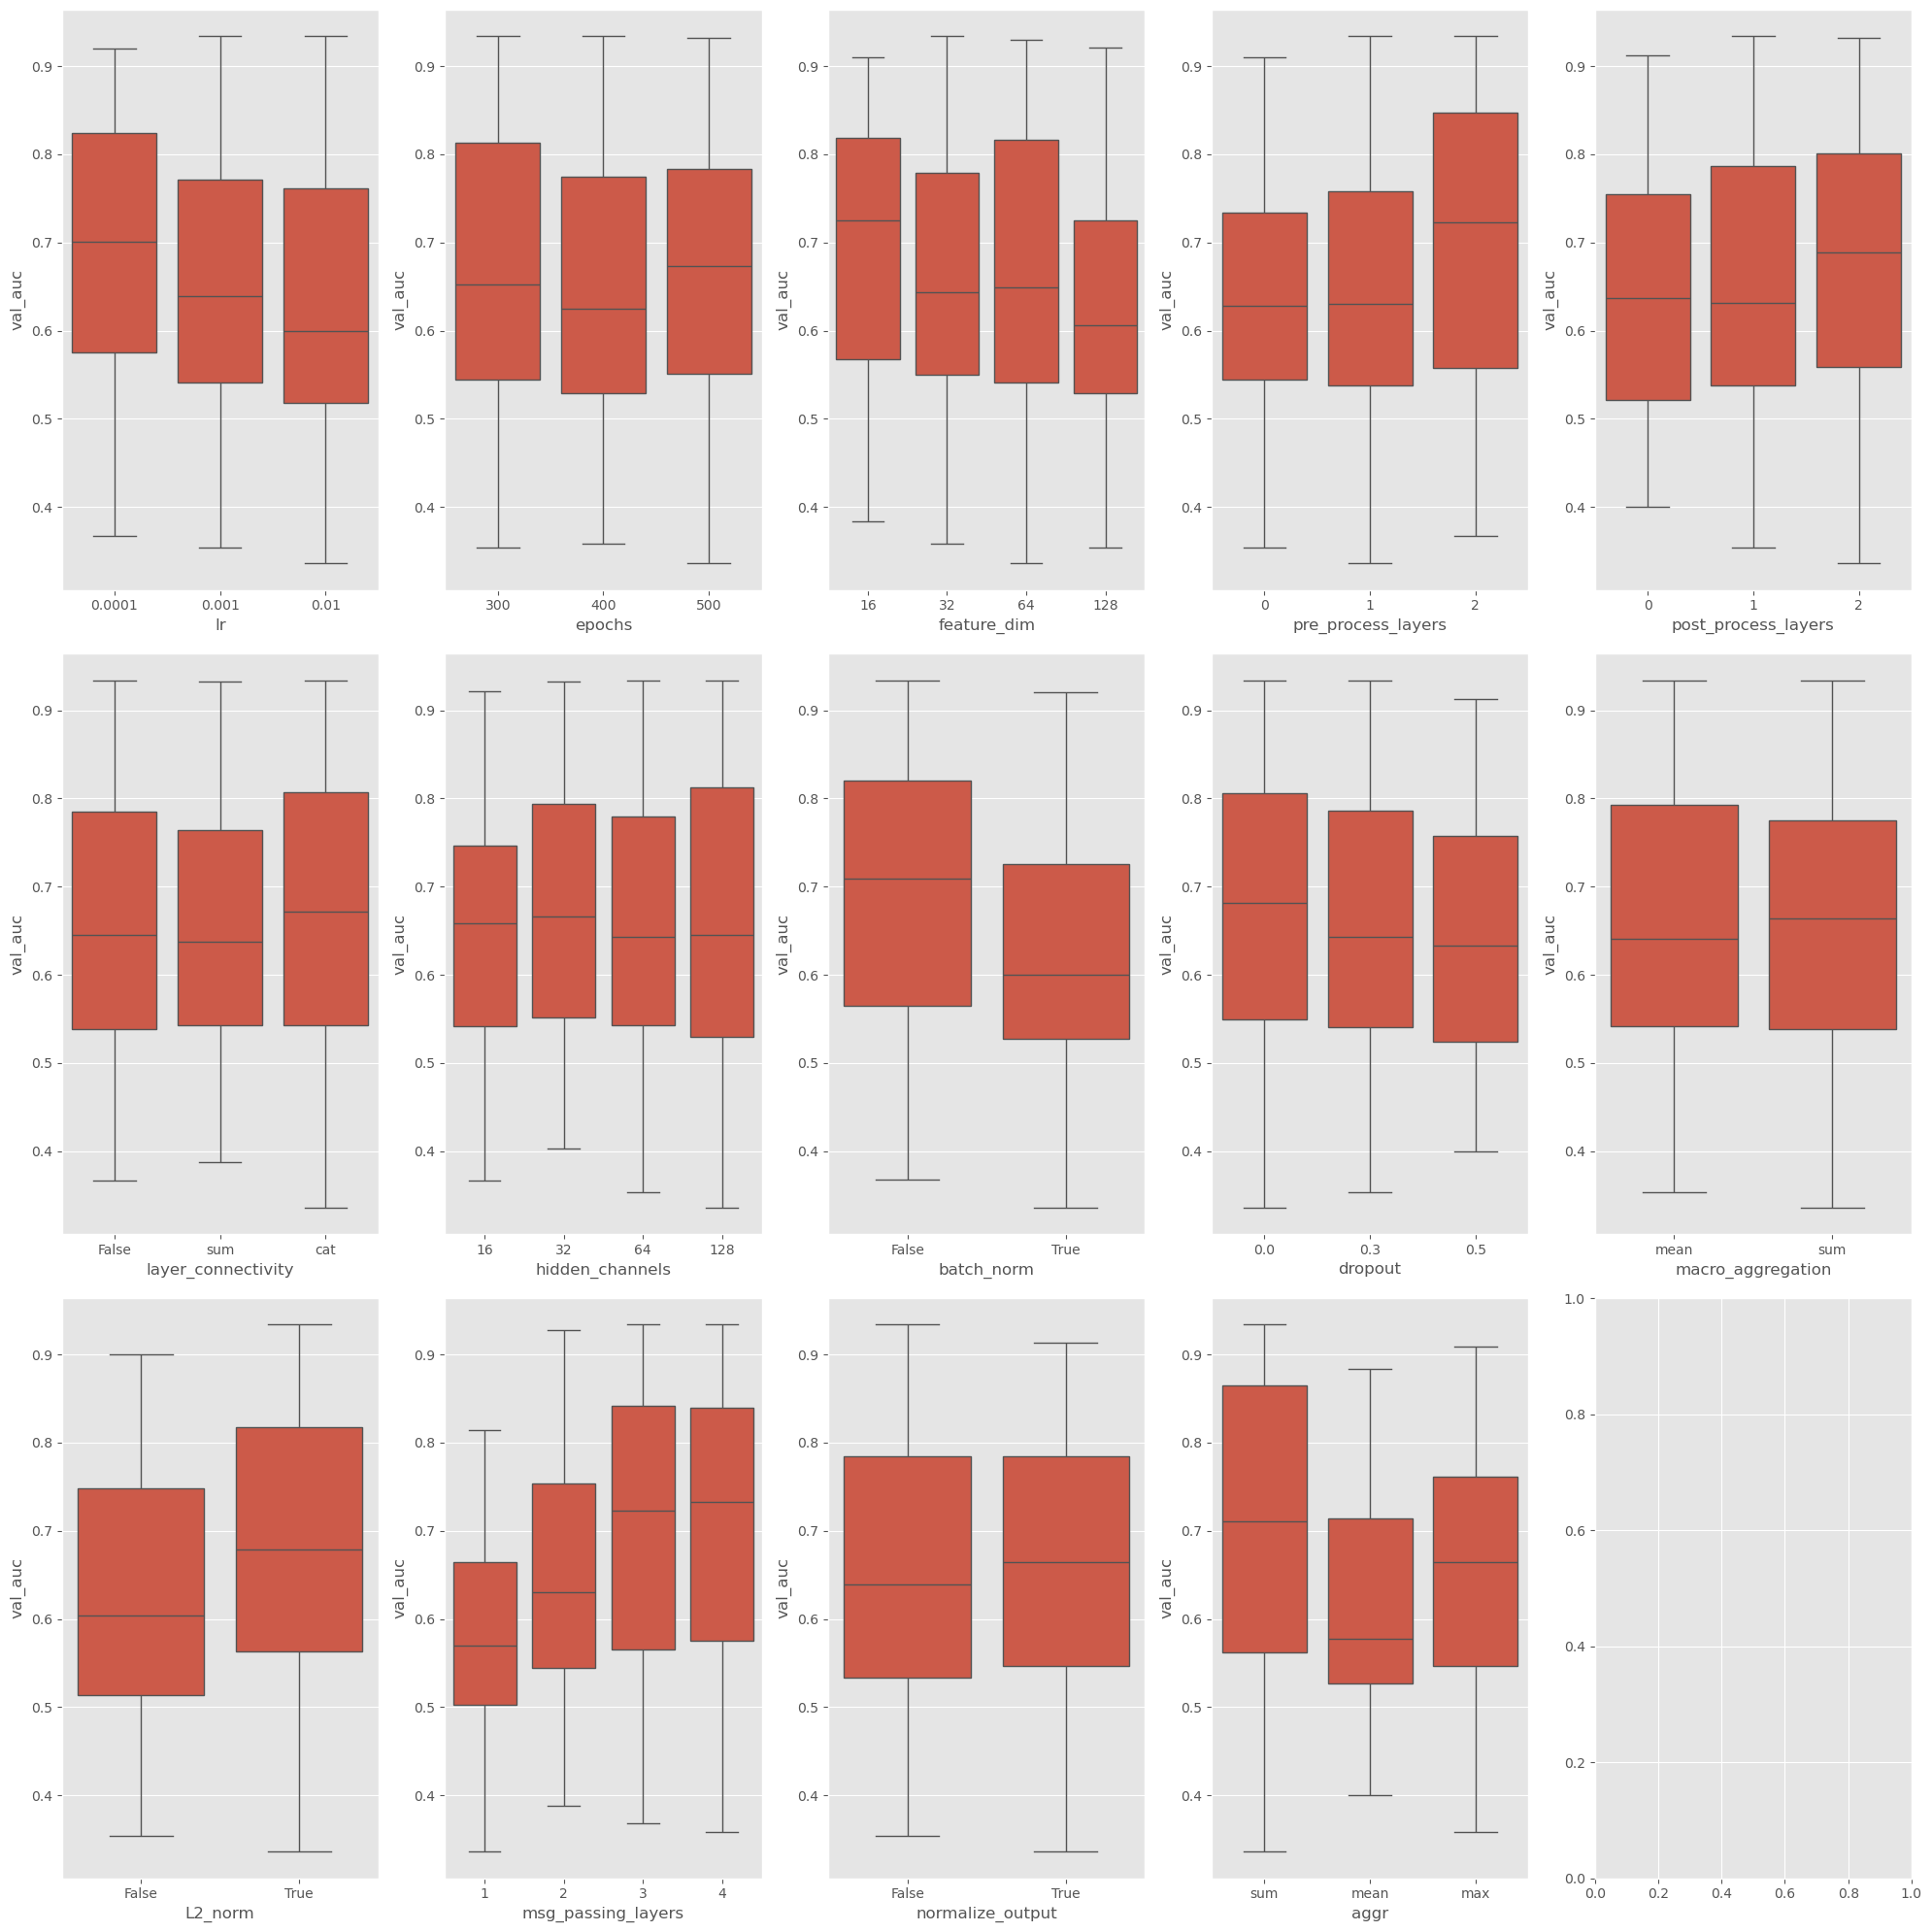

In [115]:
fig, axes = plt.subplots(3, 5, figsize=(20,20)) 
for i in range(15):
    if i < 14:
        sns.boxplot(x=hps[i], y="val_auc", data=sage_walk, ax=axes[i//5, i%5])
plt.tight_layout()
plt.show()

Caminata con features

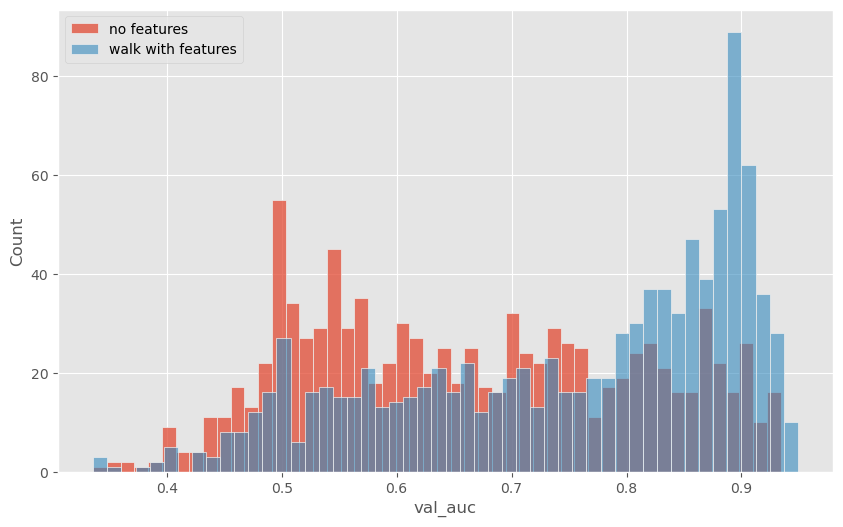

In [124]:
plt.figure(figsize=(10,6))
sns.histplot(sage_walk["val_auc"], bins=50, label="no features")
sns.histplot(full_walk["val_auc"], bins=50, label="walk with features", alpha=0.6)
plt.legend()


<Axes: xlabel='features', ylabel='val_auc'>

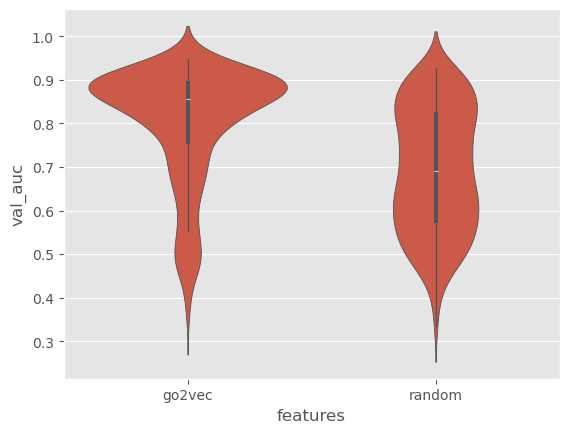

In [99]:
sns.violinplot(x="features", y="val_auc", data=full_walk)

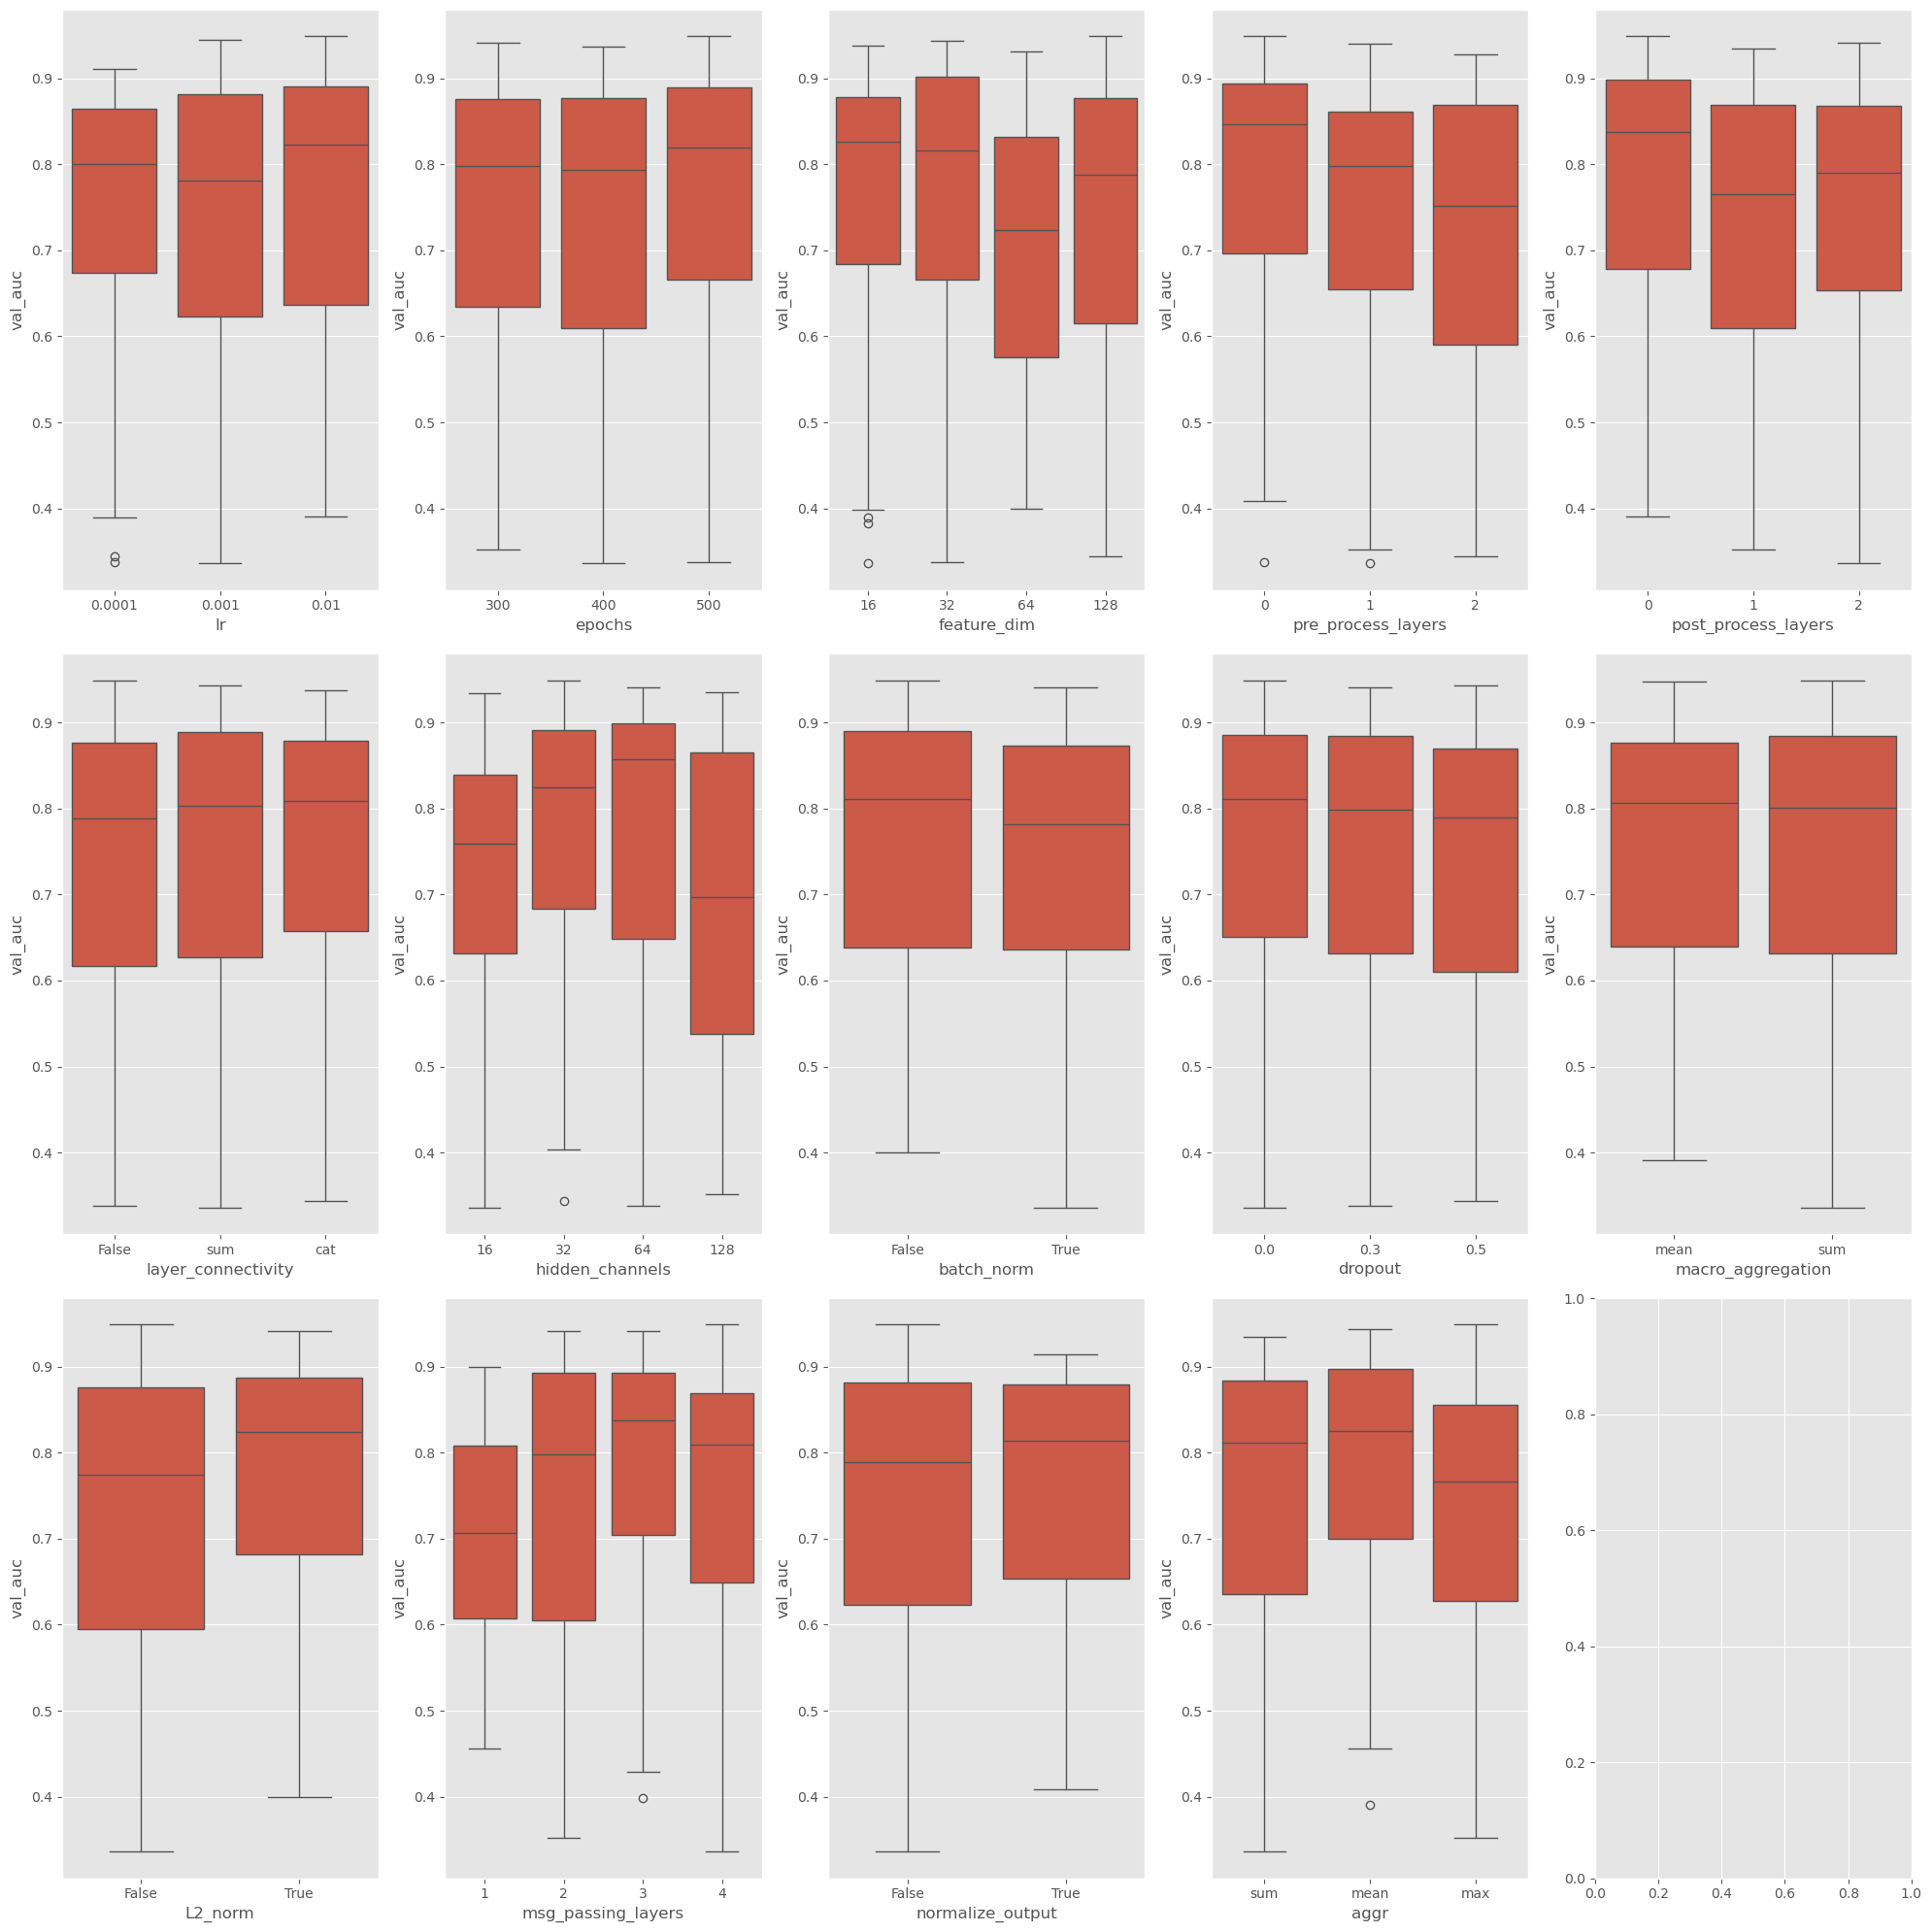

In [116]:
fig, axes = plt.subplots(3, 5, figsize=(20,20)) 
for i in range(15):
    if i < 14:
        sns.boxplot(x=hps[i], y="val_auc", data=full_walk, ax=axes[i//5, i%5])
plt.tight_layout()
plt.show()

In [127]:
full_go2vec = full_walk[full_walk["features"] =="go2vec"]
full_rand = full_walk[full_walk["features"] =="random"]

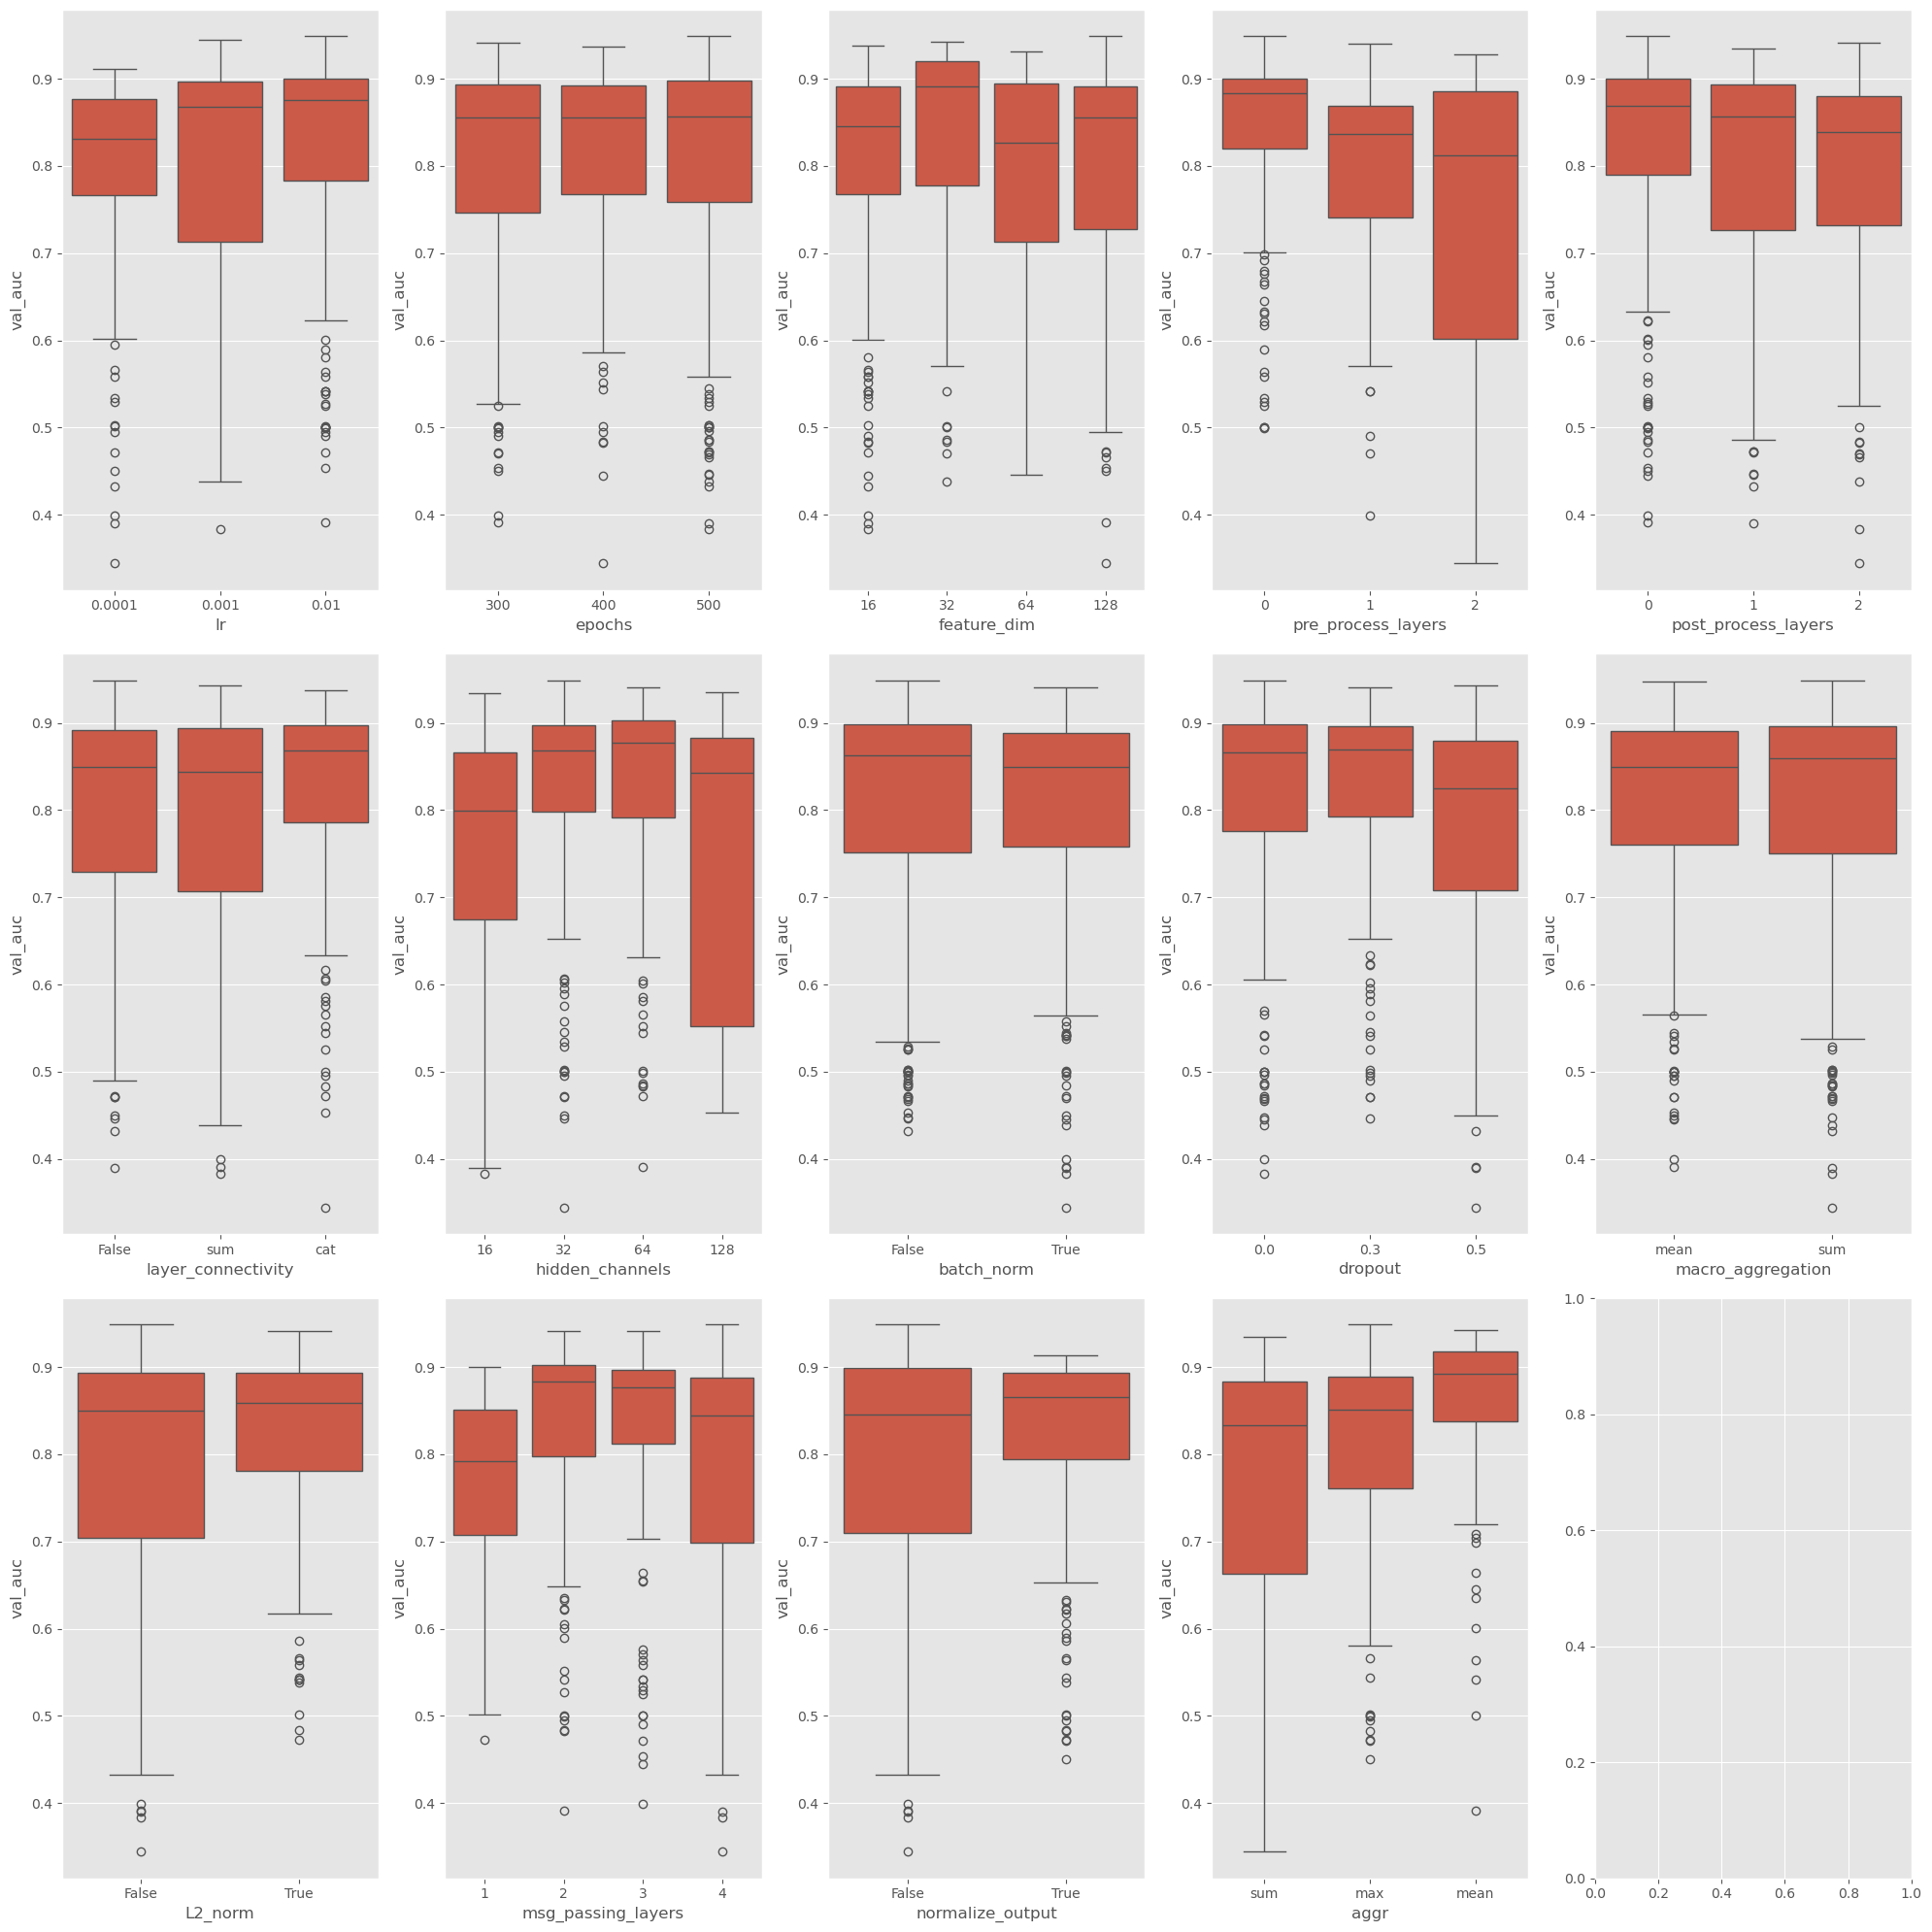

In [128]:
fig, axes = plt.subplots(3, 5, figsize=(20,20)) 
for i in range(15):
    if i < 14:
        sns.boxplot(x=hps[i], y="val_auc", data=full_go2vec, ax=axes[i//5, i%5])
plt.tight_layout()
plt.show()

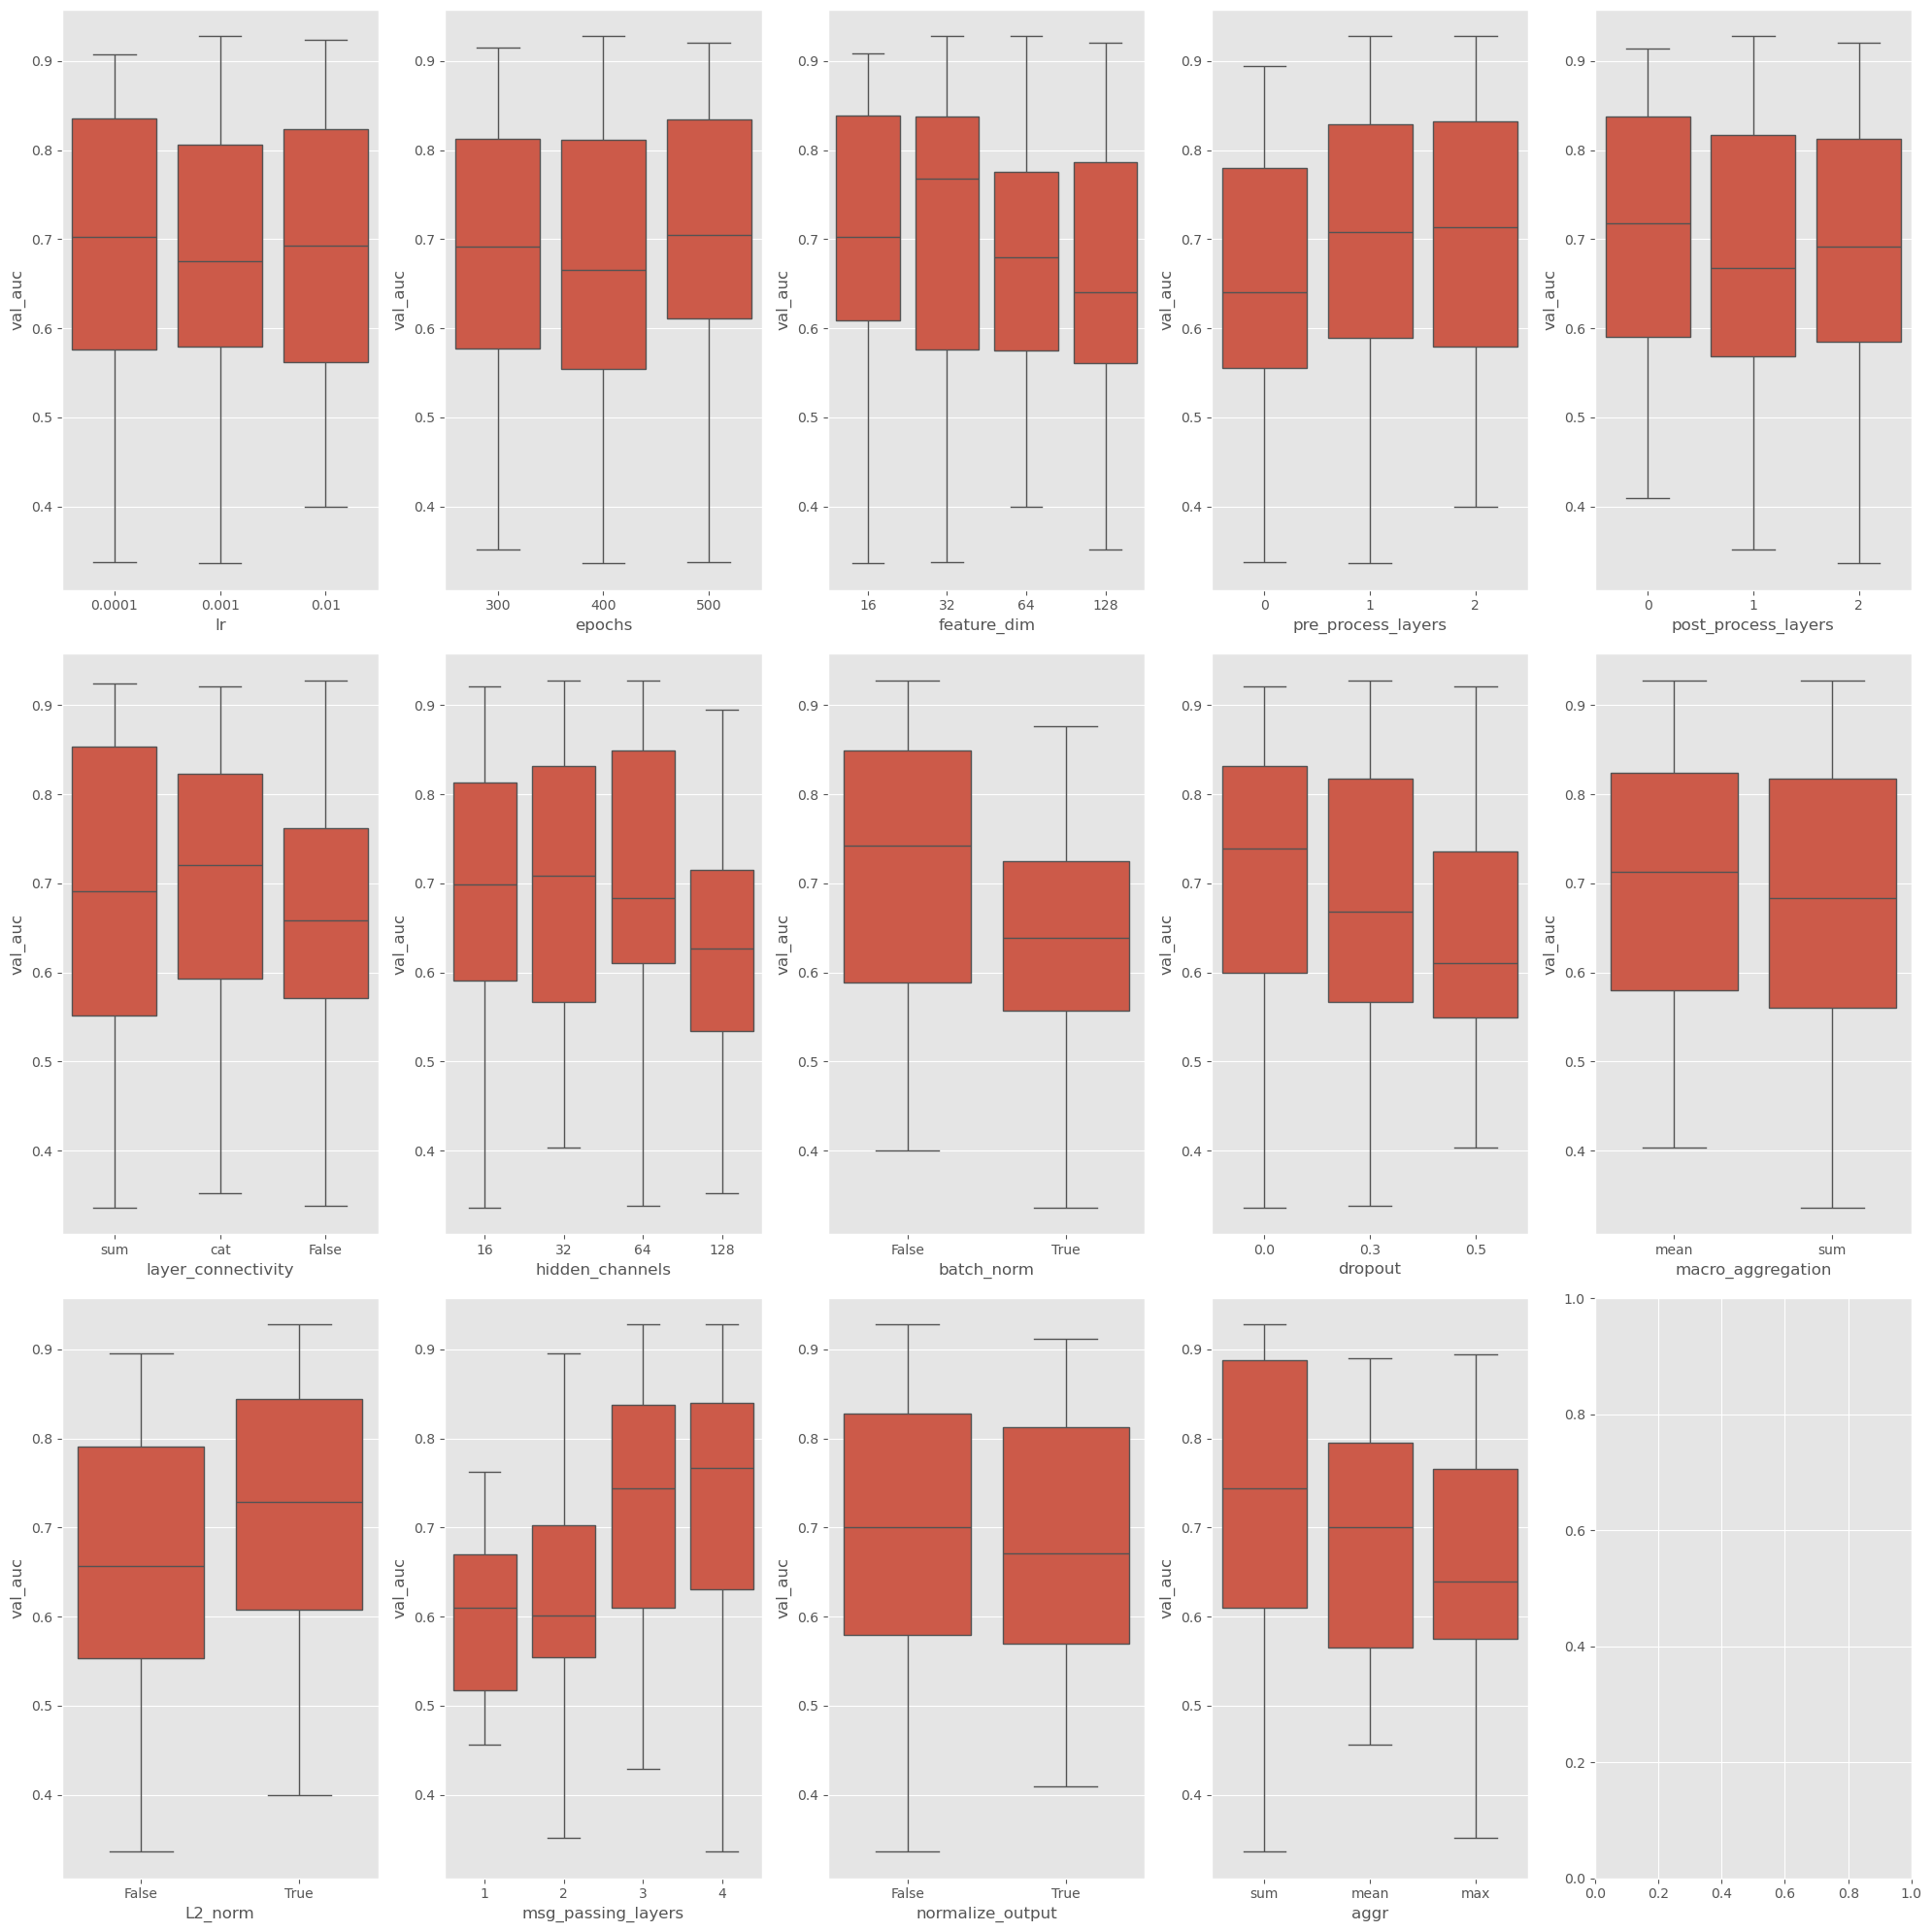

In [129]:
fig, axes = plt.subplots(3, 5, figsize=(20,20)) 
for i in range(15):
    if i < 14:
        sns.boxplot(x=hps[i], y="val_auc", data=full_rand, ax=axes[i//5, i%5])
plt.tight_layout()
plt.show()

Top 400 para features random pero reemplazando features con go2vec

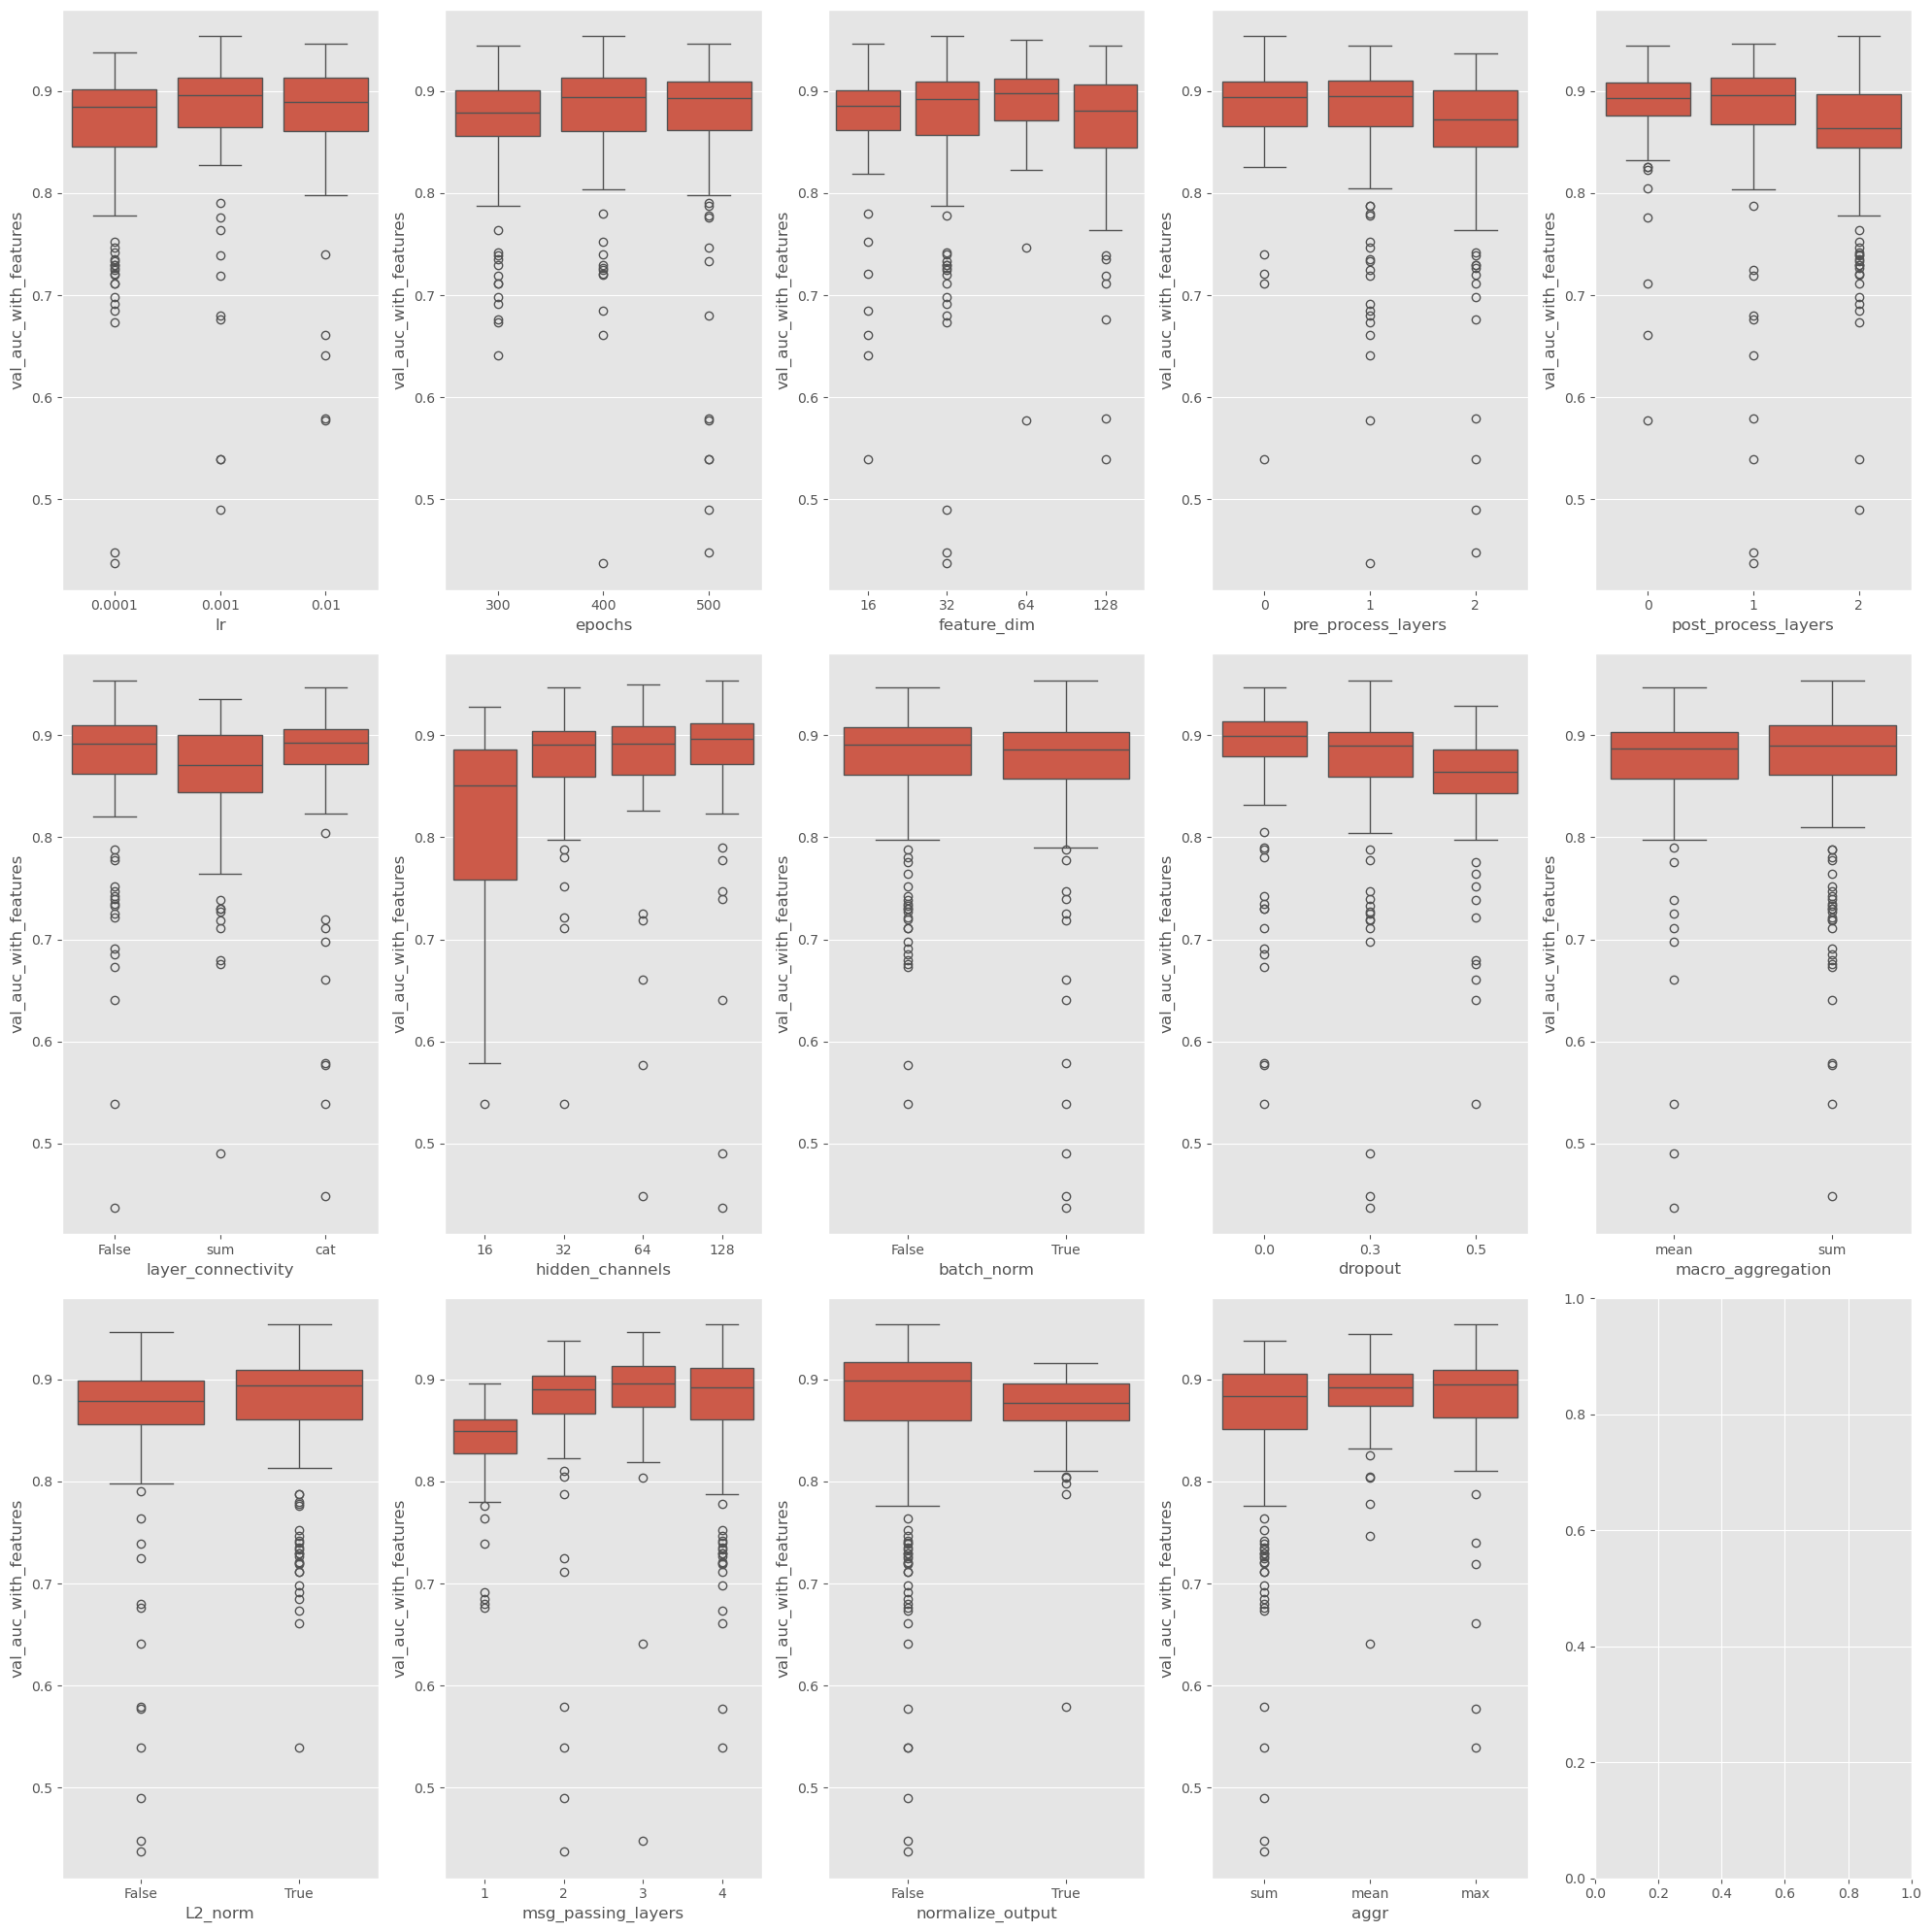

In [117]:
fig, axes = plt.subplots(3, 5, figsize=(20,20)) 
for i in range(15):
    if i < 14:
        sns.boxplot(x=hps[i], y="val_auc_with_features", data=walk_with_features, ax=axes[i//5, i%5])


plt.tight_layout()
plt.show()

Top 400 para features random

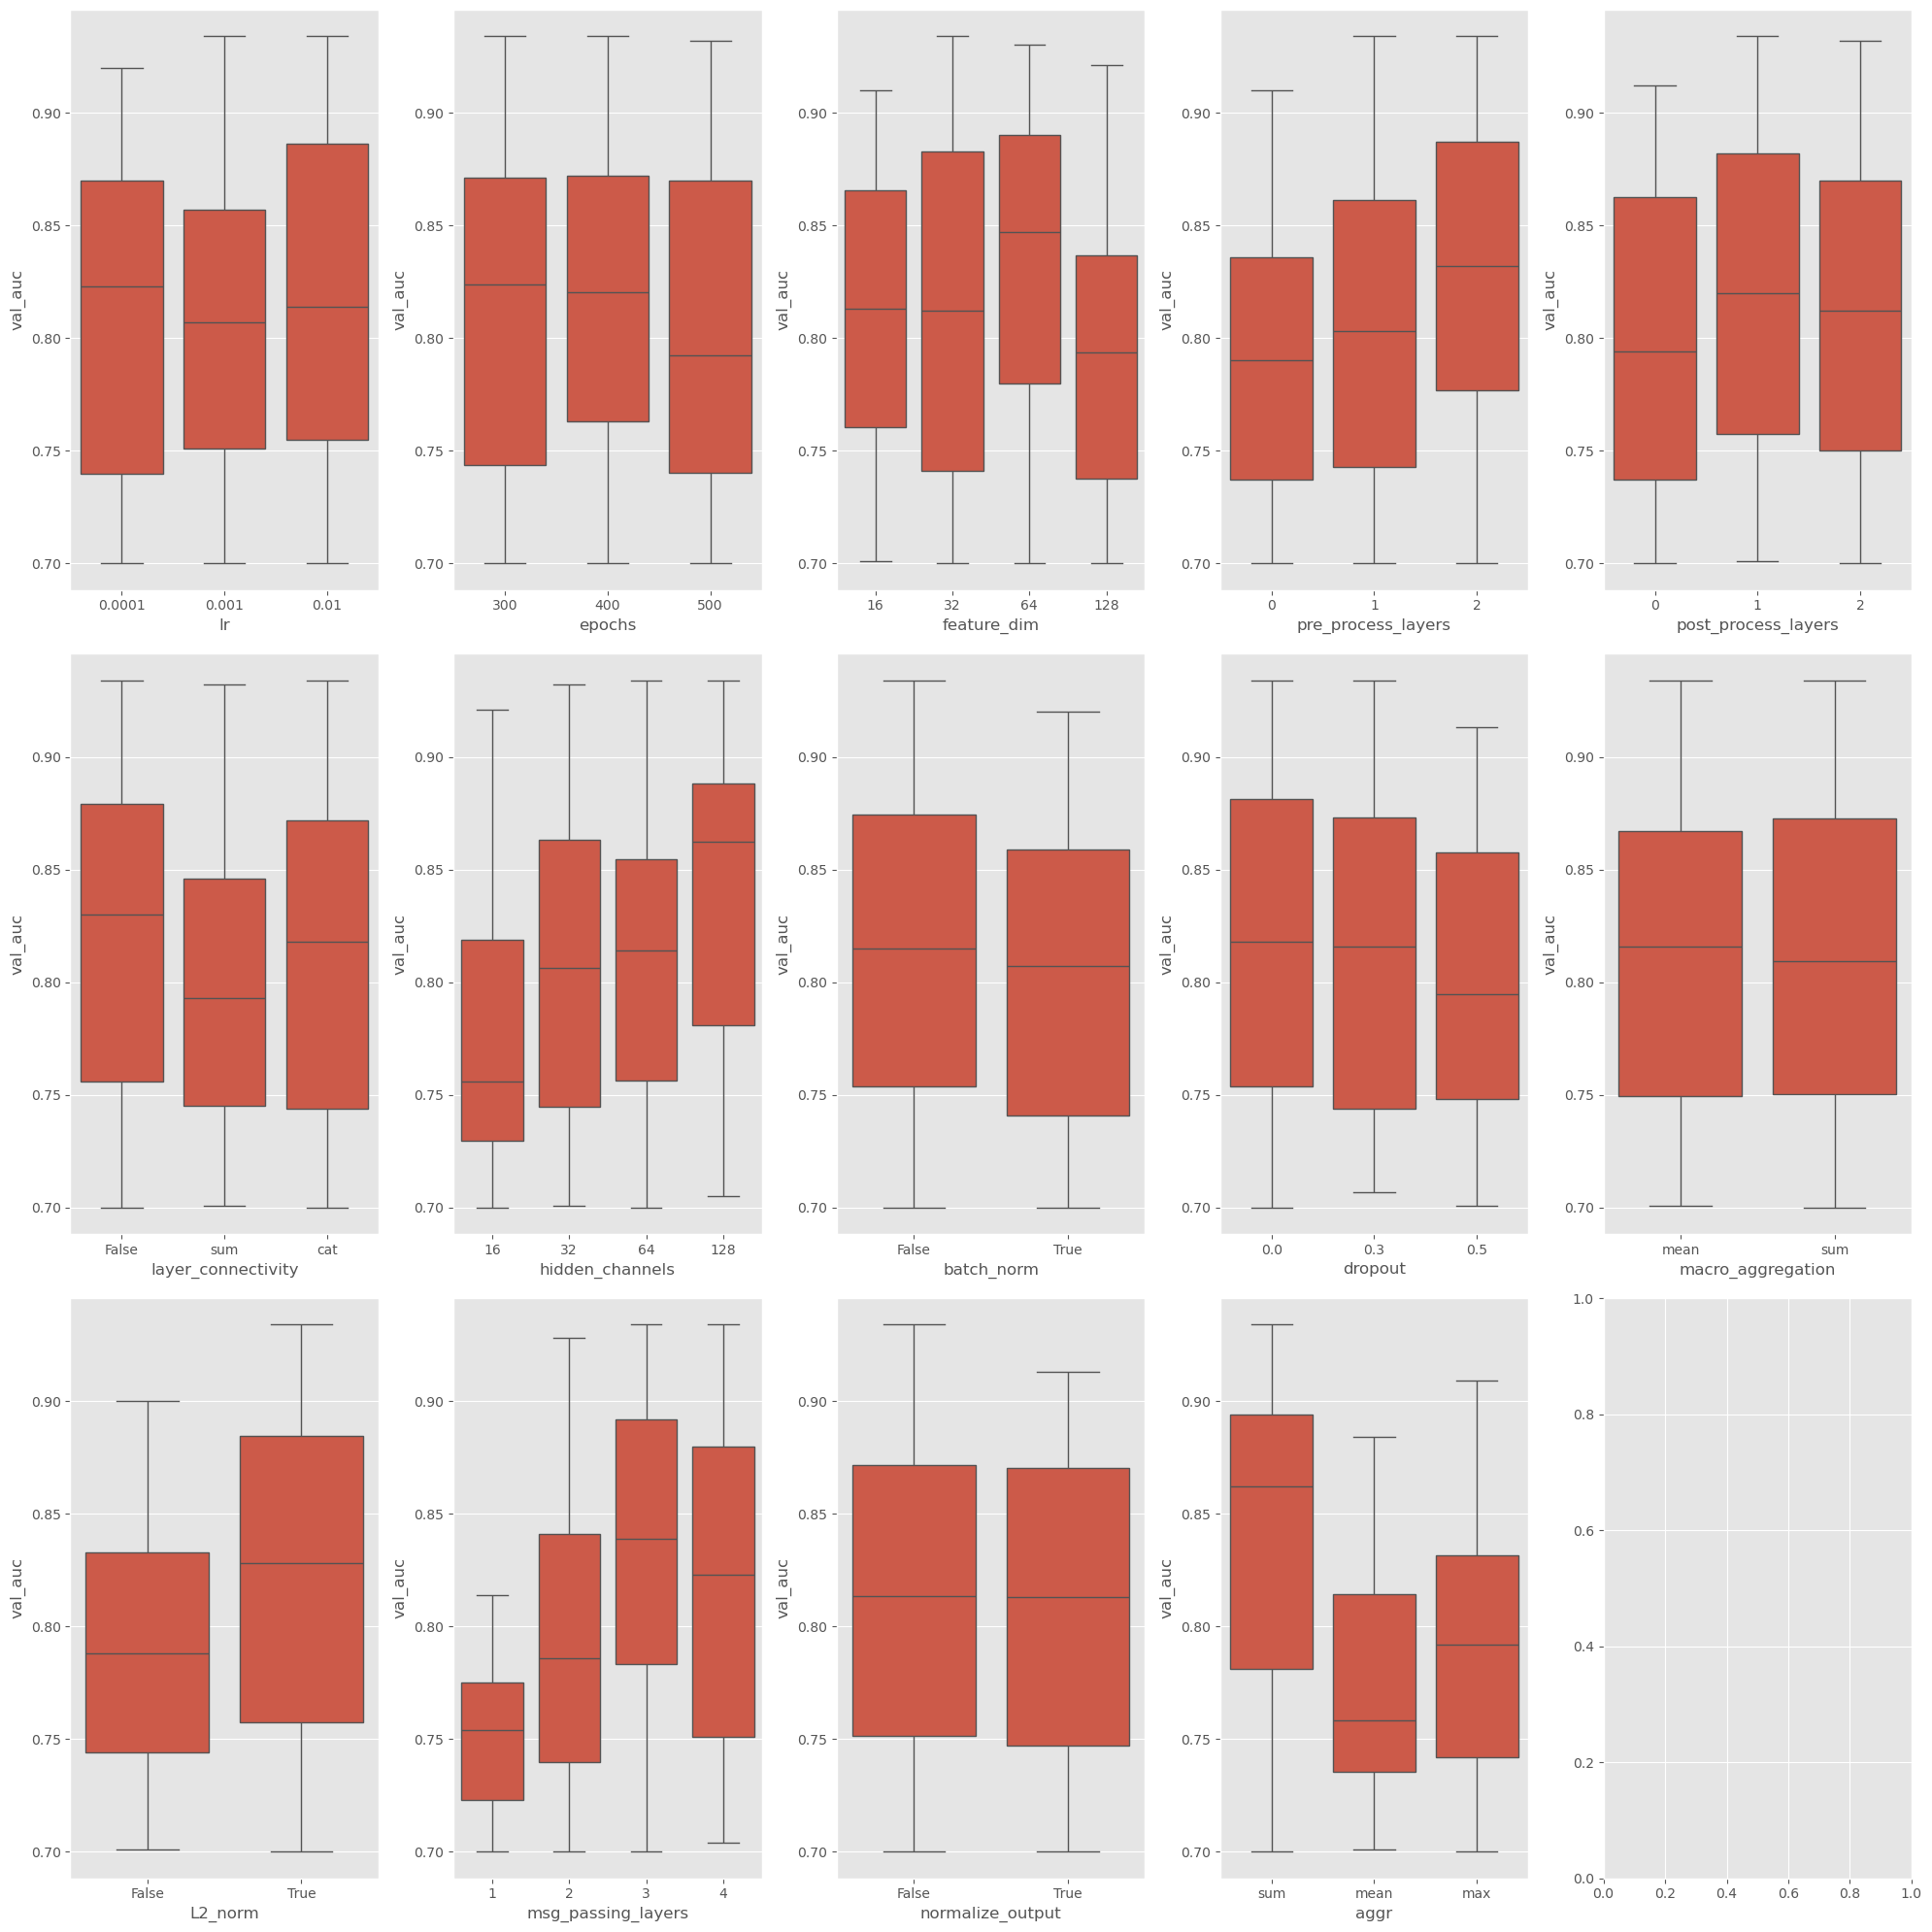

In [118]:
fig, axes = plt.subplots(3, 5, figsize=(20,20)) 
for i in range(15):
    if i < 14:
        sns.boxplot(x=hps[i], y="val_auc", data=walk_with_features, ax=axes[i//5, i%5])


plt.tight_layout()
plt.show()

#### Grafico de auc vs distancia en hiperparametros

In [171]:
def hp_auc_dist(row1, row2):
    return sum(row1[:-2] != row2[:-2]), abs(row1["val_auc"]-row2["val_auc"])

In [173]:
import itertools
from concurrent.futures import ProcessPoolExecutor

def calculate_distances(df):
    pairs = list(itertools.combinations(df.iterrows(), 2))  # Generate all unique row pairs
    with ProcessPoolExecutor(max_workers=20) as executor:
        results = list(executor.map(hp_auc_dist, [(row1[1], row2[1]) for row1, row2 in pairs]))
    return results

In [155]:
results_rand = calculate_distances(sage_walk)

In [ ]:
results_full = calculate_distances(full_walk)

Correlaciones entre hiperparametros

In [85]:
mean_auc_pivot = walk_with_features.pivot_table(index='feature_dim', columns='aggr', values='val_auc')

<Axes: xlabel='aggr', ylabel='feature_dim'>

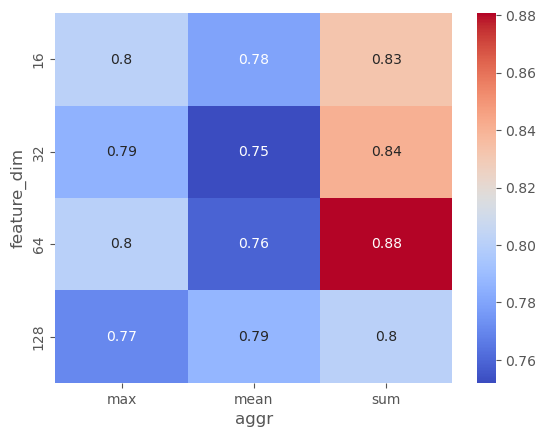

In [86]:
sns.heatmap(mean_auc_pivot, annot=True, cmap="coolwarm")